<a href="https://colab.research.google.com/github/DeepankarAcharyya/Stock_Market_Analysis_Capstone_Project/blob/master/Stock_Market_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Getting the Data

In [2]:
import pandas_datareader
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,1,1)

In [5]:
tesla = web.DataReader('TSLA','yahoo', start,end)

In [6]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [7]:
ford = web.DataReader('F','yahoo', start,end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619


In [8]:
gm = web.DataReader('GM','yahoo', start,end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


Visualizing the data:

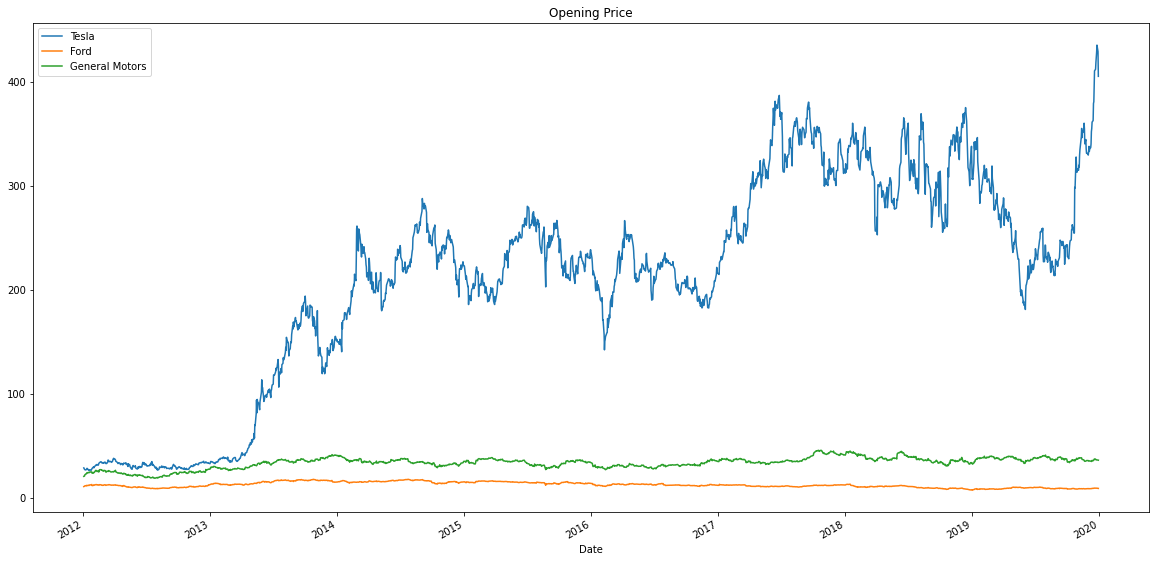

In [9]:
tesla['Open'].plot(label='Tesla',figsize=(20,10),title="Opening Price")
ford['Open'].plot(label="Ford")
gm['Open'].plot(label="General Motors")
plt.legend()

Volume of stock traded each day:

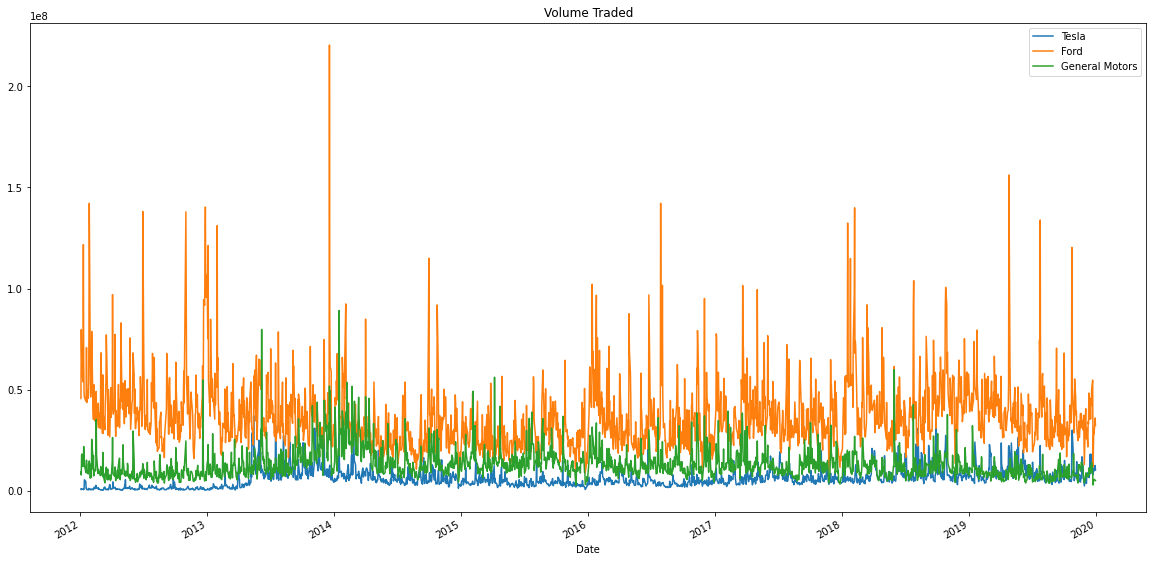

In [10]:
tesla['Volume'].plot(label='Tesla',figsize=(20,10),title="Volume Traded")
ford['Volume'].plot(label="Ford")
gm['Volume'].plot(label="General Motors")
plt.legend()

In [11]:
tesla['Volume'].idxmax()

Timestamp('2013-05-14 00:00:00')

Total amount of money traded per day:

In [12]:
tesla['Money Traded']=tesla['Volume']*tesla['Open']
ford['Money Traded']=ford['Volume']*ford['Open']
gm['Money Traded']=gm['Volume']*gm['Open']

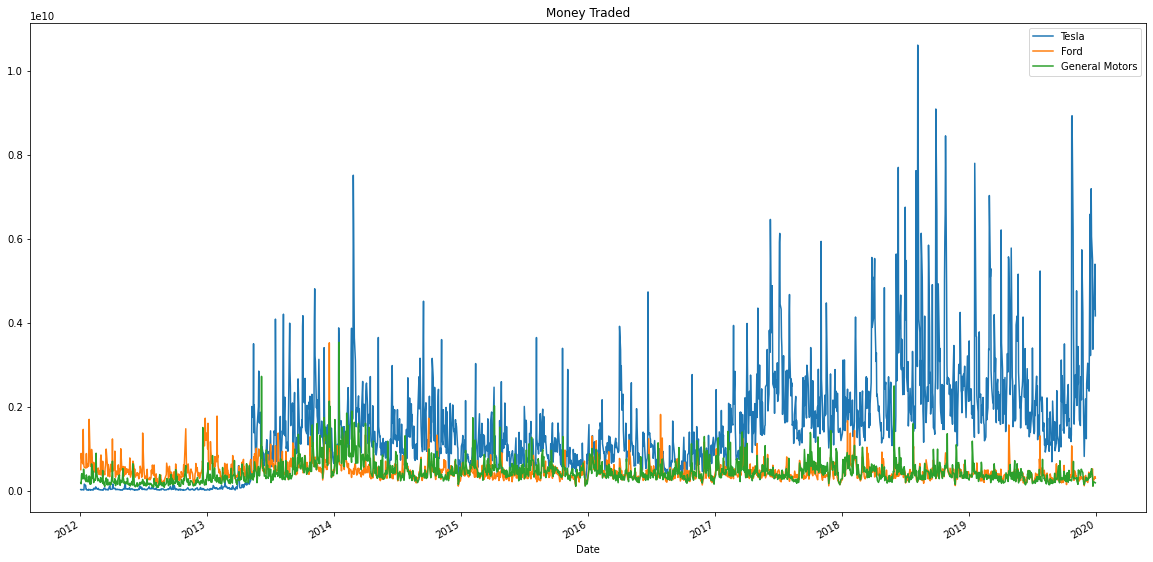

In [13]:
tesla['Money Traded'].plot(label='Tesla',figsize=(20,10),title="Money Traded")
ford['Money Traded'].plot(label="Ford")
gm['Money Traded'].plot(label="General Motors")
plt.legend()

Basic Financial Analysis:

In [14]:
#Daily Returs/ Daily Percentage Change
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1

In [15]:
ford['returns'] = (ford['Close']/ford['Close'].shift(1))-1
gm['returns']=gm['Close'].pct_change(1)

In [16]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Money Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08,0.007686


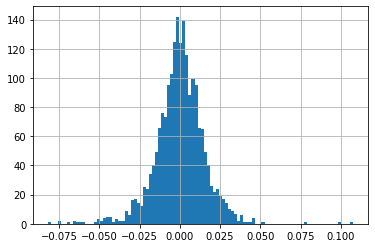

In [18]:
ford['returns'].hist(bins=100)

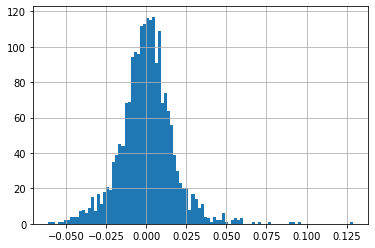

In [19]:
gm['returns'].hist(bins=100)

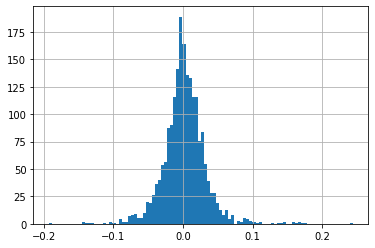

In [20]:
tesla['returns'].hist(bins=100)

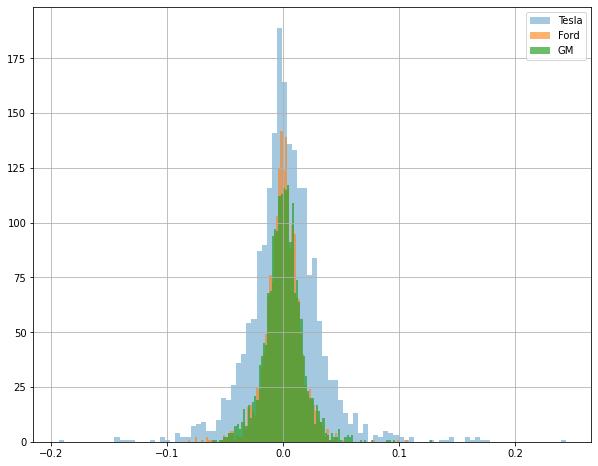

In [24]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.6)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.7)
plt.legend();

* From the above plots, we can observe the high volatility of the stocks of tesla compared to the other 2 companies.
* Wider on the x-axis : wider the volatility range.

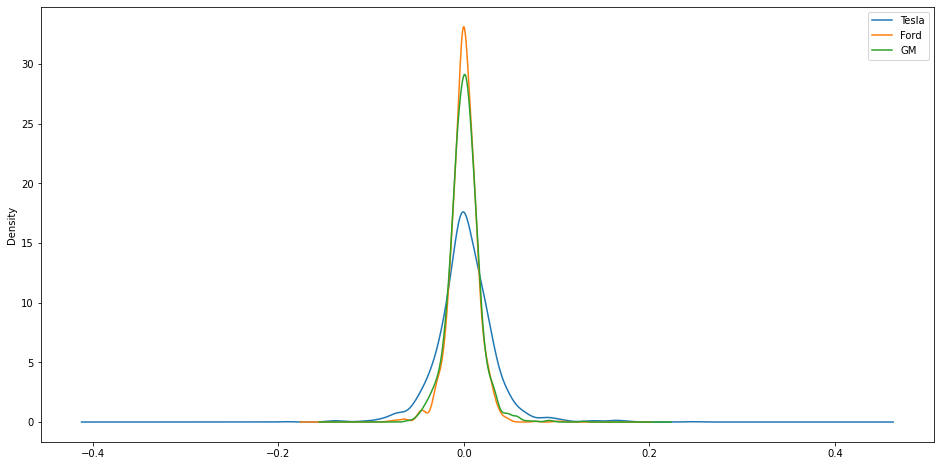

In [25]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(16,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(16,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(16,8))
plt.legend();

* we can easily observe that Ford stocks are more stable.

In [26]:
box_df=pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns=['Tesla','Ford','GM']

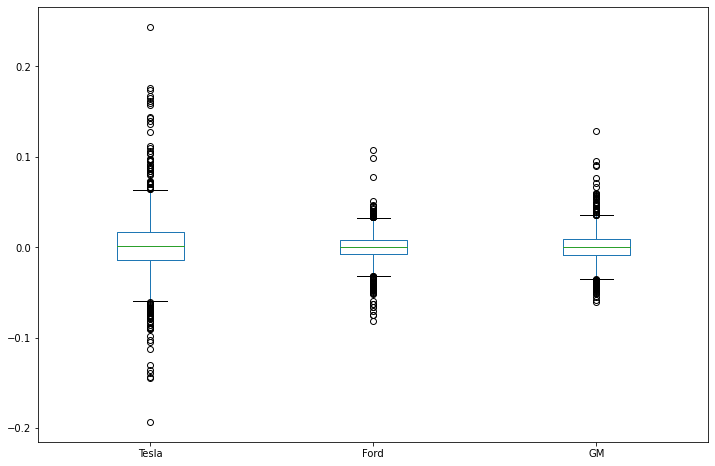

In [28]:
box_df.plot(kind='box',figsize=(12,8))

More wider the distribution-> more volatile

Scatter Plot to observe the correlation between the daily returns:

In [32]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa53859b0>,
      dtype=object)

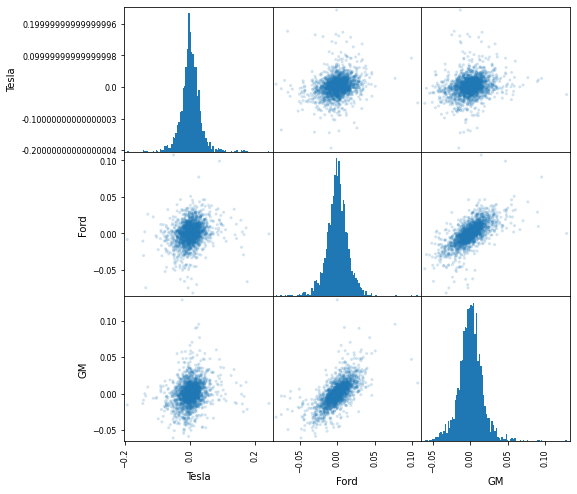

In [33]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2, hist_kwds={'bins':100})

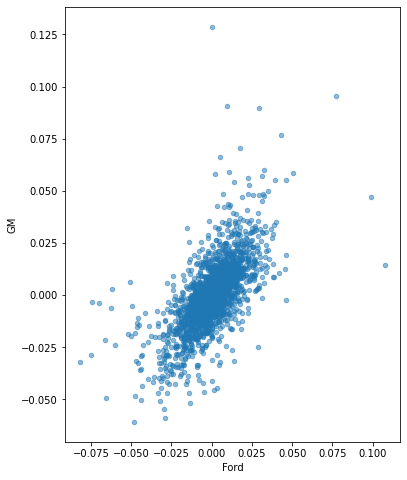

In [34]:
box_df.plot(kind='scatter',x='Ford',y='GM',alpha=0.5,figsize=(6,8))

Cummulative Daily Returns:
* less than 1 -> loss
* more than 1 -> profit

In [35]:
tesla['cummulative_return']=(1+tesla['returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Money Traded,returns,cummulative_return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [36]:
ford['cummulative_return']=(1+ford['returns']).cumprod()
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Money Traded,returns,cummulative_return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08,0.007686,1.060198


In [37]:
gm['cummulative_return']=(1+gm['returns']).cumprod()
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Money Traded,returns,cummulative_return
Date,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,-0.003490,1.085036


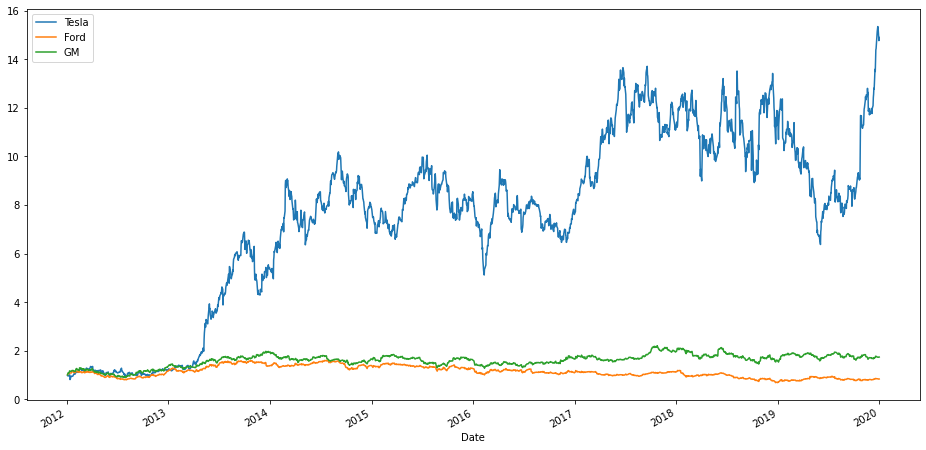

In [38]:
tesla['cummulative_return'].plot(label='Tesla',figsize=(16,8))
ford['cummulative_return'].plot(label='Ford',figsize=(16,8))
gm['cummulative_return'].plot(label='GM',figsize=(16,8))

plt.legend()